## <div class="cite2c-biblio"></div> 10 Academy Data Science Challenge

This notebook would serve as a starter for this week challenge. Feel free to use this notebook for guidance for your project. You are also allowed to use your own notebook as a starter for the project.

Import all necessary packages for the work.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [6]:
data = pd.read_csv("Data/bank-additional-full.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
print("The data has {} rows with {} features/columns".format(data.shape[0], data.shape[1]))

The data has 41188 rows with 21 features/columns


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Check if there are missing values in the data


In [11]:
print("The number of missing value(s): {}".format(data.isnull().sum().sum()))

The number of missing value(s): 0


In [12]:
data.select_dtypes(include=["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


From the data, we observe that the mean age is $40$ years with a maximum age of $98$ years and minimum age of $17$ years. The balance is the average yearly balance which is in euros.  Try to understand the rest of the data descriptions.  Whiles trying to understand the data, you could try to answer these questions:


### Univariate Analysis

In [13]:
def catplot(x,data):
    plot= sns.catplot(x, kind="count", data=data, palette="Set1")
    plt.xticks(rotation=45, horizontalalignment='right' )
    plt.title("counts"+ " "+ "of" + " "+ " " + x )
    return 

### Target

First thing to cross check is to know if the target class is balanced or not.

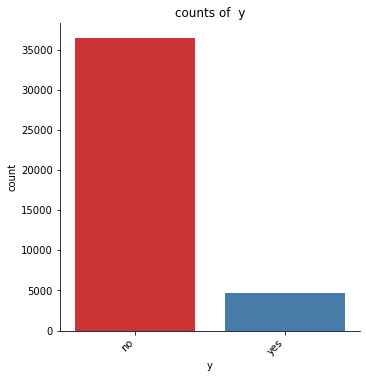

In [14]:
catplot("y",data=data)

There seems to be alot of more clients that have not subscribed to a term deposit.This is certainly a class imbalanced problem. 

1. How does this class imbalance problem impact your model performance?

2. What can data techniques approaches could be useful?

**NB:** More details on how to handle these nature of problems would be provided in the challenge, make sure you read, understand and apply to your problem.




**Marital Status**

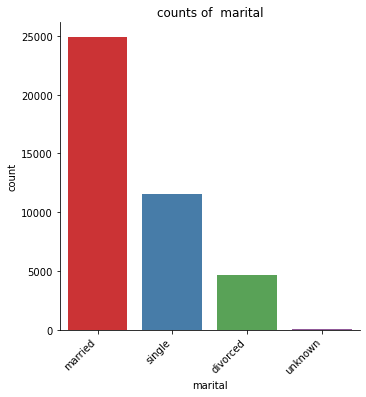

In [15]:
catplot("marital", data=data)

**Education**

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Text(0.5, 0, 'education')

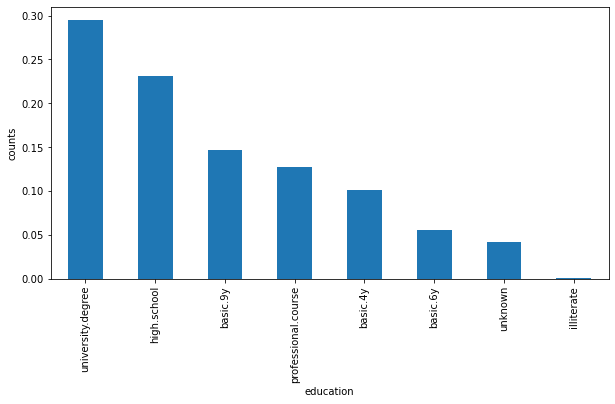

In [16]:
print(data['education'].value_counts())
plt.figure(figsize=(10,5))
data['education'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('education')

**Job**

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Text(0.5, 0, 'job')

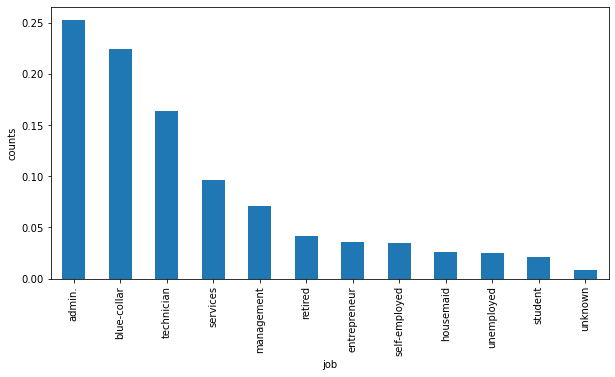

In [17]:
print(data['job'].value_counts())
plt.figure(figsize=(10,5))
data['job'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('job')

**Age Distribution**

Text(0.5, 1.0, 'Age Distribution')

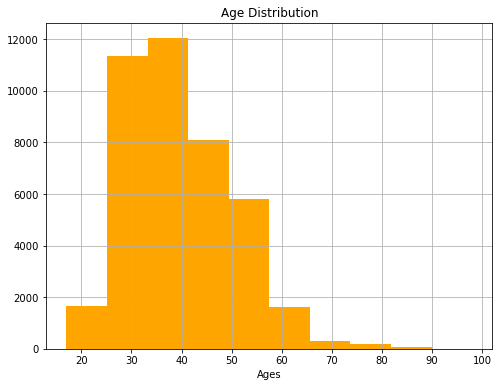

In [18]:
plt.figure(figsize=(8, 6))
data.age.hist( color="orange") 
plt.xlabel('Ages')
plt.title("Age Distribution")

### Bivariate Analysis

In [19]:
def boxplot(x, y, data=data, hue= "y"):
    plot = sns.boxplot(x= x, y=y, hue=hue, data= data)
    plt.xticks( rotation=45, horizontalalignment='right' )
    plt.title("Boxplot of " + " " + x.upper() + " " + "and "+ " " + y.upper())
    return plot

**Marital vs. age and target**

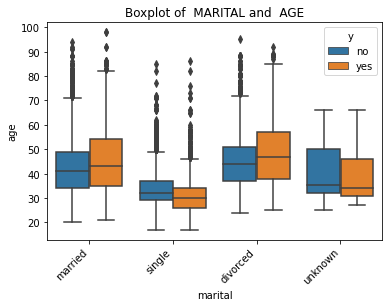

In [20]:
boxplot("marital", "age", data=data, hue= "y")

**Education vs. age and target**

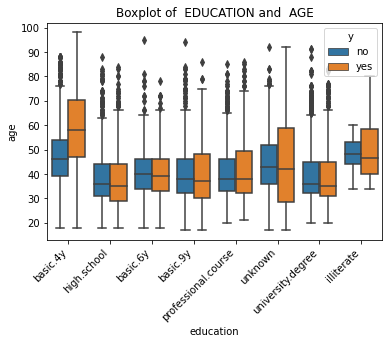

In [21]:
boxplot("education", "age", data=data, hue= "y")

**Correlation**

In [22]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


### Data Preprocessing

**Label Encoding for all Categorical Data**

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [25]:
data["job"] = encoder.fit_transform(data["job"])
data['education'] = encoder.fit_transform(data["education"])
data["marital"] = encoder.fit_transform(data["marital"])
data['default'] = encoder.fit_transform(data["default"])
data['housing'] = encoder.fit_transform(data["housing"])
data['loan'] = encoder.fit_transform(data["loan"])
data['contact'] = encoder.fit_transform(data["contact"])
data['month'] = encoder.fit_transform(data["month"])
data['poutcome'] = encoder.fit_transform(data["poutcome"])
data['day_of_week'] = encoder.fit_transform(data["day_of_week"])

data['y'] = encoder.fit_transform(data["y"])


In [26]:

num_cols = ['emp.var.rate',"pdays","age", 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']

In [27]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [28]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,0,1,6,1,...,1,0.195414,0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,1.628993,7,1,3,1,0,0,1,6,1,...,1,0.195414,0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,-0.290186,7,1,3,0,2,0,1,6,1,...,1,0.195414,0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,-0.002309,0,1,1,0,0,0,1,6,1,...,1,0.195414,0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,1.533034,7,1,3,0,0,2,1,6,1,...,1,0.195414,0,1,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,5,1,5,0,2,0,0,7,0,...,1,0.195414,0,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,0.573445,1,1,5,0,0,0,0,7,0,...,1,0.195414,0,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,1.533034,5,1,6,0,2,0,0,7,0,...,2,0.195414,0,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,0.381527,9,1,5,0,0,0,0,7,0,...,1,0.195414,0,1,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


In [29]:
X = data.drop(columns=[ "y", 'duration'])
y = data["y"]
print(X.shape)
print(y.shape)

(41188, 19)
(41188,)


In [30]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

### Split Data using sklearn  train test split

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(32950, 19)
(32950,)
(8238, 19)
(8238,)


### Machine Learning Model

**1.Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


**Confusion Matrix**

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)


In [34]:
confusion_matrix

array([[7191,  103],
       [ 736,  208]], dtype=int64)

**Intepretating Confusion Matrix**


|  | Predicted: No | Predicted Yes |
| --- | --- | --- |
| Actual No |TN: 7191  | FP: 103 |
|  |  |  |
| Actual Yes |FN: 736  | TP: 208 |

1. Correct predictions: 7191 + 103 = 7294

2. Wrong Predictions: 736+ 208 = 944
  

**Classification Report**

In [35]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.91      0.99      0.94      7294
           1       0.67      0.22      0.33       944

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238



**ROC Curve:**

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance

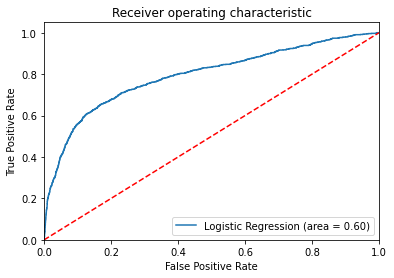

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#print("fpr{}, tpr{}". format(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**2. Decision Trees**

In [37]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

In [38]:
clf_decision = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_decision = clf_decision.fit(X_train, y_train)
y_pred = clf_decision.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8971837824714737


**Important Features**

In [39]:
import_decision= pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf_decision.feature_importances_}).\
                    sort_values('importance', ascending = False)

import_decision.head(4)

,feature,importance
18,nr.employed,0.752599
16,cons.conf.idx,0.106772
13,poutcome,0.078092
15,cons.price.idx,0.031159


**Tree Plotting**

In [40]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image 

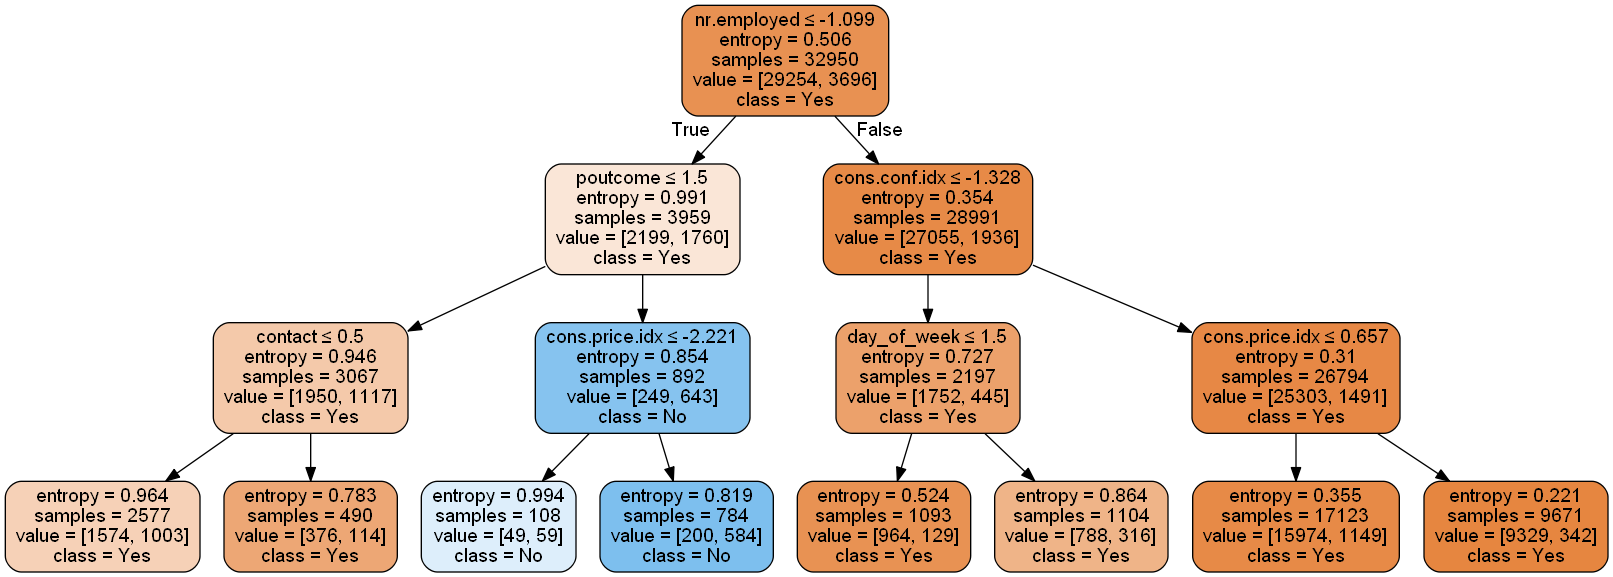

In [41]:
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

dot_data = StringIO()
export_graphviz(clf_decision, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Yes','No'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('term_deposit.png')
Image(graph.create_png())

### Try the following Models:


1. Multilayer Perceptron

2. Random Forest Classifier

3. Xgboost Classifier

4. Support Vector Machine (Try different kernel too rbf, linear and poly)

